In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/retail_sales_dataset.csv')







In [2]:
#info sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
#tipos de datos de las columnas
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [4]:
#descripcion del df, incluyendo info como emdia, mediana. etc
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
#suma valores q se repiten
df.value_counts()

,,,,,,,,,count
Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,1
672,2023-08-01,CUST672,Female,34,Beauty,2,50,100,1
659,2023-03-19,CUST659,Female,39,Electronics,1,30,30,1
660,2023-04-29,CUST660,Female,38,Beauty,2,500,1000,1
661,2023-07-16,CUST661,Female,44,Clothing,4,25,100,1
...,...,...,...,...,...,...,...,...,...
339,2023-03-03,CUST339,Female,22,Electronics,2,25,50,1
340,2023-10-19,CUST340,Female,36,Clothing,4,300,1200,1
341,2023-05-07,CUST341,Male,31,Clothing,4,50,200,1


In [ ]:
#valores unicos
print(df['Product Category'].unique())


['Beauty' 'Clothing' 'Electronics']


In [ ]:
#valores numericos unicos
print(df['Product Category'].nunique())

3


In [ ]:
#mostrar datos faltantes
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
#mostrar datos faltantes x columna

print(df['Product Category'].isnull().sum())


0


In [ ]:
#se calculan las ventas totales x producto
total_sales_by_product = df.groupby('Product Category')['Total Amount'].sum()
print("Total de ventas por producto:")
print(total_sales_by_product)

Total de ventas por producto:
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [ ]:
#calcular ventas por fecha
#se normaliza fecha
df['Date'] = pd.to_datetime(df['Date'])
daily_sales_by_product = df.groupby([df['Date'].dt.date, 'Product Category'])['Total Amount'].mean()
print("\nVentas diarias por producto:")
print(daily_sales_by_product)


Ventas diarias por producto:
Date        Product Category
2023-01-01  Beauty              1500.0
            Clothing            1050.0
2023-01-02  Beauty                25.0
            Clothing             825.0
            Electronics           90.0
                                 ...  
2023-12-29  Beauty              1100.0
            Electronics          100.0
2023-12-31  Electronics           50.0
2024-01-01  Beauty              1500.0
            Electronics           30.0
Name: Total Amount, Length: 655, dtype: float64


In [ ]:
#calcular el maximo y minimo de ventas por producto
max_sales_product = total_sales_by_product.idxmax(), total_sales_by_product.max()
print("\nProducto con más ventas:", max_sales_product)
min_sales_product = total_sales_by_product.idxmin(), total_sales_by_product.min()
print("\nProducto con menos ventas:", min_sales_product)


Producto con más ventas: ('Electronics', 156905)

Producto con menos ventas: ('Beauty', 143515)


In [ ]:
#filtrado de filas por nombre de producto o ropa
filtered_product_sales = df[df['Product Category'] == 'Electronics']
print("\nFiltrado de ventas de 'Electronics':")
print(filtered_product_sales.head())

filtered_store_sales = df[df['Product Category'] == 'Clothing']
print("\nFiltrado de ventas de 'Clothing':")
print(filtered_store_sales.head())



Filtrado de ventas de 'Electronics':
    Transaction ID       Date Customer ID  Gender  Age Product Category  \
2                3 2023-01-13     CUST003    Male   50      Electronics   
7                8 2023-02-22     CUST008    Male   30      Electronics   
8                9 2023-12-13     CUST009    Male   63      Electronics   
12              13 2023-08-05     CUST013    Male   22      Electronics   
14              15 2023-01-16     CUST015  Female   42      Electronics   

    Quantity  Price per Unit  Total Amount  
2          1              30            30  
7          4              25           100  
8          2             300           600  
12         3             500          1500  
14         4             500          2000  

Filtrado de ventas de 'Clothing':
    Transaction ID       Date Customer ID  Gender  Age Product Category  \
1                2 2023-02-27     CUST002  Female   26         Clothing   
3                4 2023-05-21     CUST004    Male   37  

In [ ]:
#Se calcula el total de ventas por cantidad
total_sales_mult_quantity = df['Total Amount'] * df['Quantity']
print("\nMultiplicación del total de ventas por cantidad (primeras filas):")
print(total_sales_mult_quantity.head())




Multiplicación del total de ventas por cantidad (primeras filas):
0     450
1    2000
2      30
3     500
4     200
dtype: int64


In [ ]:
# Suma de las cantidades vendidas
sum_quantities = df['Quantity'].sum()
# Diferencia de precios entre productos (Beauty y Clothing)
price_diff = df[df['Product Category'] == 'Beauty']['Price per Unit'].mean() - \
             df[df['Product Category'] == 'Clothing']['Price per Unit'].mean()
# Multiplicación del total de ventas por la cantidad vendida
total_sales_mult_quantity = df['Total Amount'] * df['Quantity']
# División del precio por unidad entre la cantidad
price_per_quantity = df['Price per Unit'] / df['Quantity']
print(f"\nSuma de cantidades vendidas: {sum_quantities}")
print(f"Diferencia promedio de precio entre 'Beauty' y 'Clothing': {price_diff}")
print("\nMultiplicación del total de ventas por cantidad (primeras filas):")
print(total_sales_mult_quantity.head())
print("\nDivisión del precio por cantidad (primeras filas):")
print(price_per_quantity.head())



Suma de cantidades vendidas: 2514
Diferencia promedio de precio entre 'Beauty' y 'Clothing': 9.767625305084607

Multiplicación del total de ventas por cantidad (primeras filas):
0     450
1    2000
2      30
3     500
4     200
dtype: int64

División del precio por cantidad (primeras filas):
0     16.666667
1    250.000000
2     30.000000
3    500.000000
4     25.000000
dtype: float64


In [ ]:

df.value_counts('Product Category')

#filtrado por valores numericos
ventas_mayores_50 = df[df['Total Amount'] > 50]
print(ventas_mayores_50.head())

ventas_menores_05 = df[df['Total Amount'] < 0.5]
print(ventas_menores_05)



   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   
7               8 2023-02-22     CUST008    Male   30      Electronics   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
3         1             500           500  
4         2              50           100  
7         4              25           100  
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [ ]:
#utilizamos el metodo query
df.query("`Total Amount` == 50 and `Product Category` == 'Clothing' ")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
18,19,2023-09-16,CUST019,Female,62,Clothing,2,25,50
40,41,2023-02-22,CUST041,Male,34,Clothing,2,25,50
58,59,2023-07-05,CUST059,Male,62,Clothing,1,50,50
105,106,2023-05-18,CUST106,Female,46,Clothing,1,50,50
126,127,2023-07-24,CUST127,Female,33,Clothing,2,25,50
134,135,2023-02-26,CUST135,Male,20,Clothing,2,25,50
142,143,2023-07-17,CUST143,Female,45,Clothing,1,50,50
150,151,2023-12-15,CUST151,Male,29,Clothing,1,50,50
169,170,2023-06-02,CUST170,Female,25,Clothing,2,25,50


In [ ]:

#utilizamos iloc para buscar datos, en este caso dos columnas solo en la fila de 5 a la 10
df.loc[5:10, ['Product Category', 'Price per Unit']]


,Product Category,Price per Unit
5,Beauty,30
6,Clothing,25
7,Electronics,25
8,Electronics,300
9,Clothing,50
10,Clothing,50


In [ ]:
#mostrar las primer filas y columans con iloc
df.iloc[:5, :3]

,Transaction ID,Date,Customer ID
0,1,2023-11-24,CUST001
1,2,2023-02-27,CUST002
2,3,2023-01-13,CUST003
3,4,2023-05-21,CUST004
4,5,2023-05-06,CUST005


In [ ]:
#utlizamos el metodo groupby para ver solo las columans que necesitamos
df.groupby('Product Category')['Total Amount'].sum()
#Vemos la ganancia entre las categorias, las cuales no difieren mucho

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


In [ ]:
#hacemos lo mismo pero con la media de las ventas por producto
df.groupby('Product Category')['Total Amount'].mean()

,Total Amount
Product Category,
Beauty,467.475570
Clothing,443.247863
Electronics,458.786550


In [ ]:
#Calculamos la venta total por fecha
df['Date'] = pd.to_datetime(df['Date'])
ventas_diarias = df.groupby([df['Date'].dt.date, 'Product Category'])['Total Amount'].mean()
ventas_diarias
print("\nPromedio de ventas diarias por producto:")
print(ventas_diarias.head())


Promedio de ventas diarias por producto:
Date        Product Category
2023-01-01  Beauty              1500.0
            Clothing            1050.0
2023-01-02  Beauty                25.0
            Clothing             825.0
            Electronics           90.0
Name: Total Amount, dtype: float64


In [17]:
#crear una columna nueva con ventas totales
df['Total Sales'] = df['Quantity'] * df['Price per Unit']
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Desviacion,Month,Total Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-238.000000,2023-11,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,558.787879,2023-02,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-365.800000,2023-01,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,28.243243,2023-05,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-344.642857,2023-05,100


In [18]:
def classify_sales(sales):
    if sales >= df['Total Sales'].quantile(0.75):
        return 'Alta'
    elif sales >= df['Total Sales'].quantile(0.25):
        return 'Media'
    else:
        return 'Baja'

In [19]:
# Creamos una columna con el valor de sales clasificado
df['Categoria Ventas'] = df['Total Sales'].apply(classify_sales)
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Desviacion    Month  Total Sales  \
0         3              50           150 -238.000000  2023-11          150   
1         2             500          1000  558.787879  2023-02         1000   
2         1              30            30 -365.800000  2023-01           30   
3         1             500           500   28.243243  2023-05          500   
4         2              50           100 -344.642857  2023-05          100   

  Categoria Ventas  
0            Media  
1             Alta  
2             Baj

In [20]:
# Convertir la columna de fechas a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el mes de la fecha
df['Month'] = df['Date'].dt.to_period('M')

# Agrupar por 'Product Category' y 'Month'
df_agrupado = df.groupby(['Product Category', 'Month'])

# Mostrar la cantidad de elementos en cada grupo
print(df_agrupado.size().head())

Product Category  Month  
Beauty            2023-01    25
                  2023-02    26
                  2023-03    21
                  2023-04    29
                  2023-05    28
dtype: int64


In [21]:
#Funcion de agregacion, podemos usar mas de dos metodos para una columna
df_agrupado.agg({'Total Sales': ['mean', 'std', 'var']}).head()

Total Sales                           
                                mean         std            var
Product Category Month                                         
Beauty           2023-01  497.200000  641.745796  411837.666667
                 2023-02  539.807692  697.754227  486860.961538
                 2023-03  502.142857  482.914515  233206.428571
                 2023-04  410.517241  519.650200  270036.330049
                 2023-05  444.642857  571.555591  326675.793651

In [22]:
# Función personalizada para calcular la desviación respecto a la media de su grupo
def deviation_from_mean(x):
    return x - x.mean()

# Aplicar la función personalizada sobre 'Total Sales' para calcular la desviación de cada venta
df['Desviacion'] = df_agrupado['Total Sales'].transform(deviation_from_mean)

# Mostrar las primeras filas para verificar la desviación
print(df[['Total Sales', 'Desviacion']].head())

   Total Sales  Desviacion
0          150 -238.000000
1         1000  558.787879
2           30 -365.800000
3          500   28.243243
4          100 -344.642857


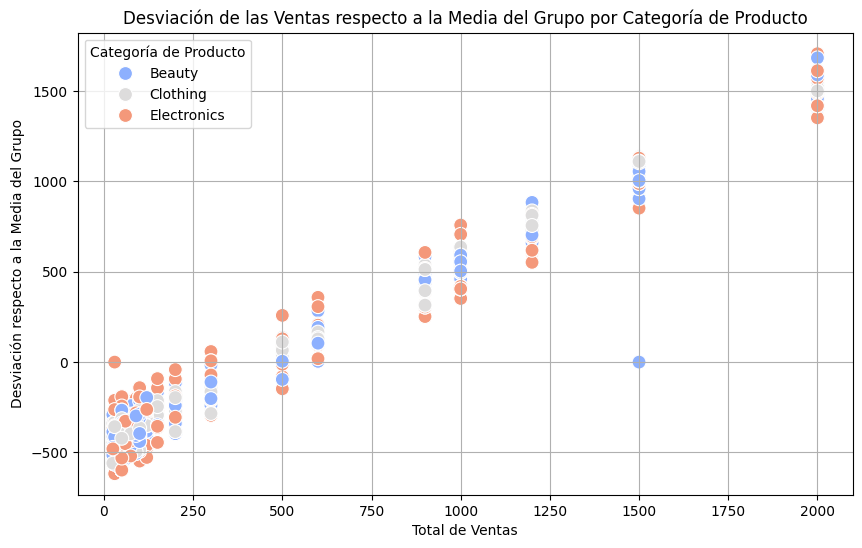

In [23]:
#grafico de dispersión con seaborn
#se muestra la desviacion de la media por categoria y total de ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Sales', y='Desviacion', hue='Product Category', data=df, palette='coolwarm', s=100)

plt.title('Desviación de las Ventas respecto a la Media del Grupo por Categoría de Producto')
plt.xlabel('Total de Ventas')
plt.ylabel('Desviación respecto a la Media del Grupo')
plt.legend(title='Categoría de Producto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#las ventas de la categoria Beauty en total sales 1500 es atipico

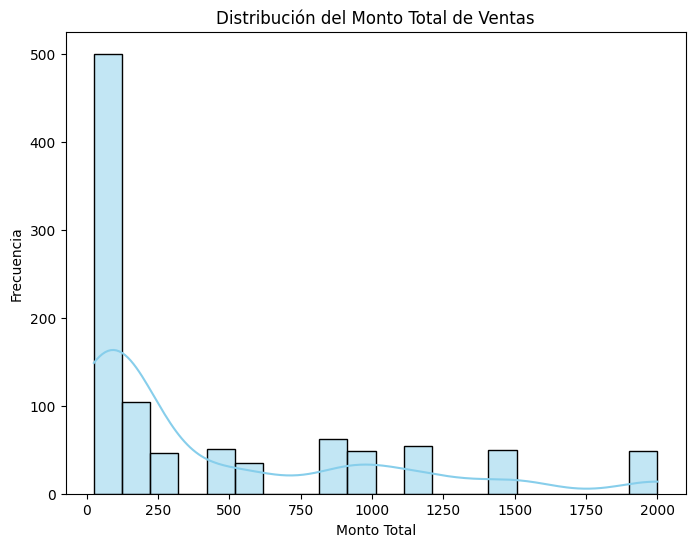

In [25]:
# Histograma para visualizar la distribución del Total Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Monto Total de Ventas')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')
plt.show()
#podemos ver que la mayor cantidad de ventas se encuentra en productos de menor precio

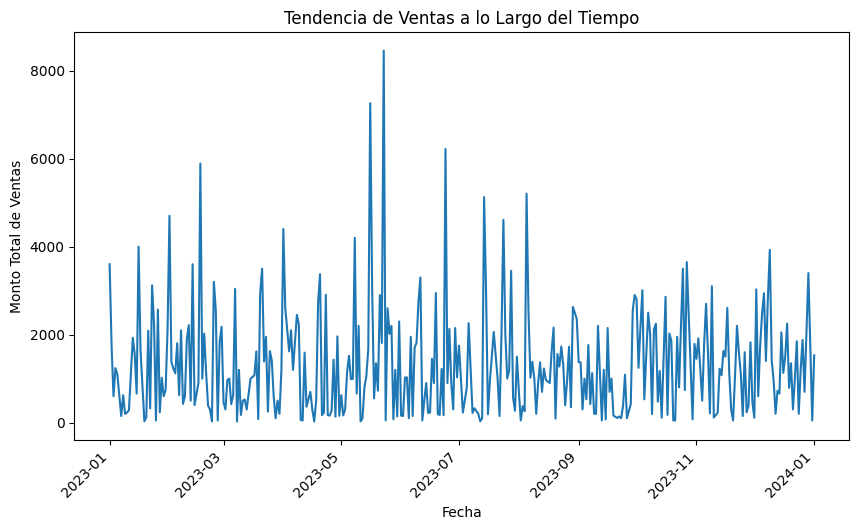

In [26]:
#grafico de lineas
#convertir fecha a formato correcto
df['Date'] = pd.to_datetime(df['Date'])

# Crear un gráfico de líneas de la tendencia de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
df.groupby('Date')['Total Amount'].sum().plot()
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


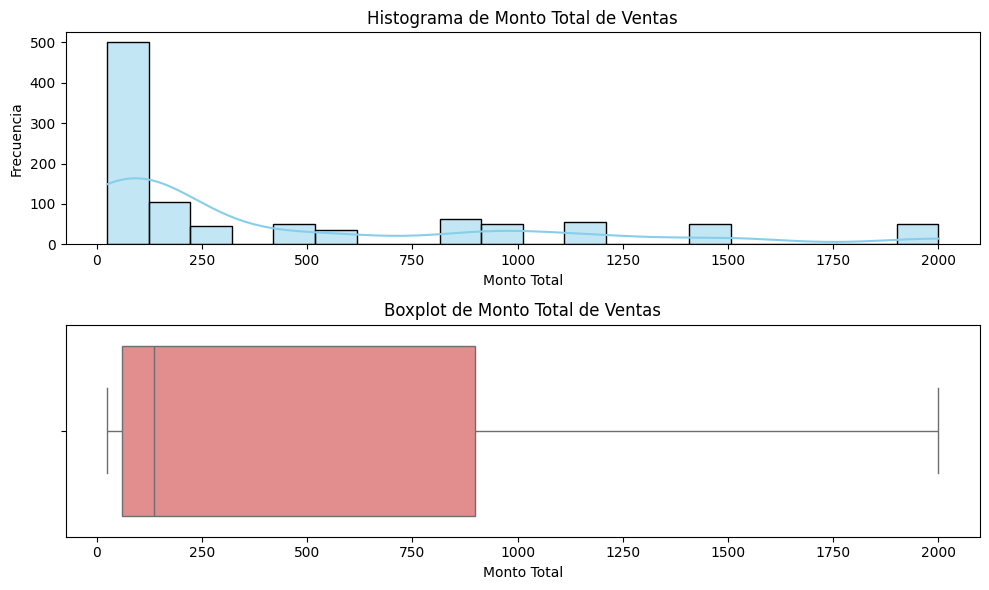

In [27]:
#utilizamos subplots con histogramas y boxplot
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
sns.histplot(df['Total Amount'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Monto Total de Ventas')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')


plt.subplot(2, 1, 2)
sns.boxplot(x='Total Amount', data=df, color='lightcoral')
plt.title('Boxplot de Monto Total de Ventas')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

#ambos nos dan resultados similares